In [1]:
import obspy
import obspy.taup
from obspy.taup.tau_model import TauModel
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
from obspy.taup.taup_time import TauPTime
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Gudkova = TauPyModel(model="Gudkova")
model = Gudkova

In [3]:
tt = TauPTime(model = "Gudkova", phase_list=['P', 'S'], depth = 25, degrees = 30)

In [4]:
print(tt)

In [5]:
p_ls = []; s_ls = []
dist_ls = []
for dist in [10,20,30,40,50]:
    arrivals = model.get_ray_paths(phase_list=["P", "S"], source_depth_in_km=20,
                               distance_in_degree=dist)
    p_arrival = arrivals[0].time
    s_arrival = arrivals[1].time
    p_ls.append(p_arrival)
    s_ls.append(s_arrival)
    dist_ls.append(dist)
    
    #ax = arrivals.plot_times()

print(arrivals)
print(p_ls, s_ls)

diff = [s - p for s, p in zip(s_ls, p_ls)]
print(diff)
print(dist_ls)

2 arrivals
	P phase arrival at 374.669 seconds
	S phase arrival at 673.580 seconds
[84.831533359899851, 162.04967587372053, 236.88289273222361, 308.07243137703853, 374.66880722739199] [86.04183262628726, 287.51592867551182, 421.46872127825981, 550.65044388349645, 673.58020489878868]
[1.210299266387409, 125.46625280179128, 184.5858285460362, 242.57801250645792, 298.91139767139668]
[10, 20, 30, 40, 50]


<IPython.core.display.Javascript object>


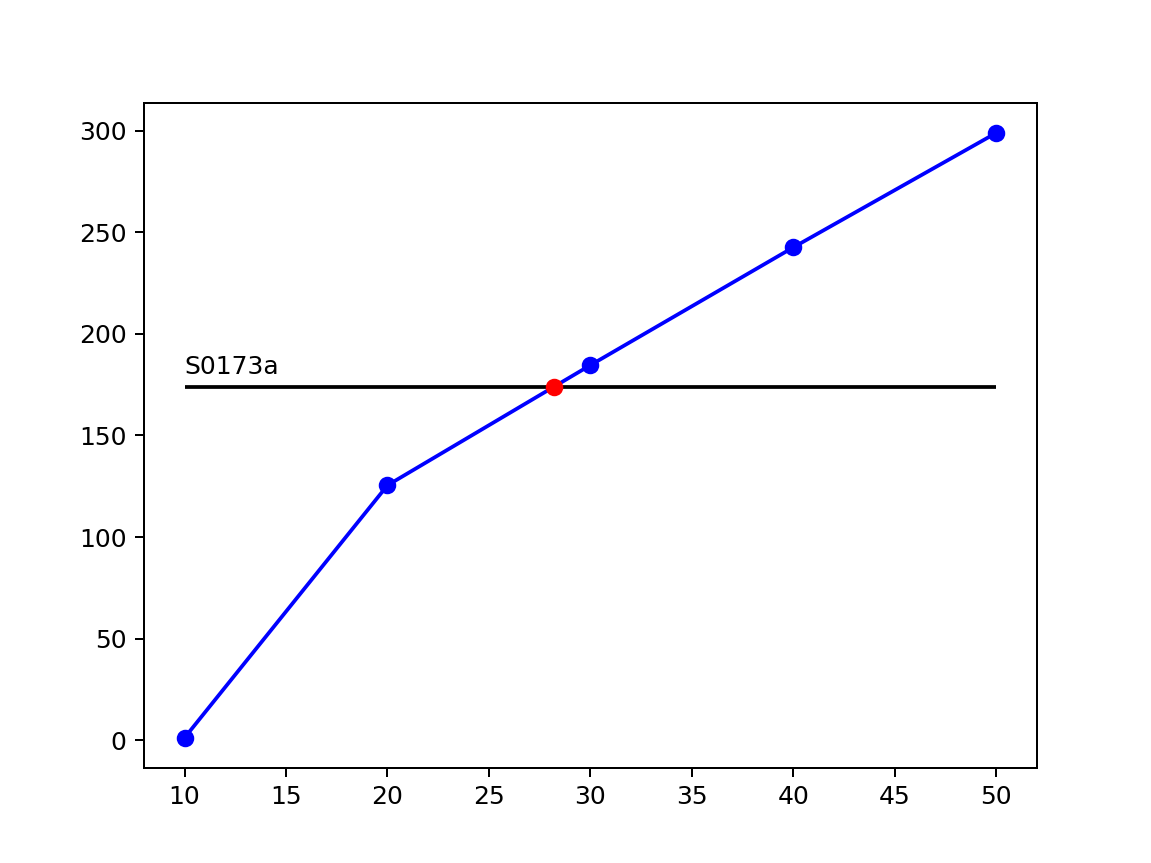

In [17]:
%matplotlib notebook
plt.plot(dist_ls,diff, 'bo-')
plt.hlines(174, 10, 50, label='S0173a')
plt.annotate('S0173a', (10,180))
plt.plot(28.2, 174, 'ro')
plt.show()

In [106]:
def distplot(model_name, source_depth):
    
    event_dict = {'S0173a': 174, 'S0235b': 187, 'S0325a': 232, 'S0183a':266}
    model = TauPyModel(model = model_name)

    p_ls = []; s_ls = []
    dist_ls = []
    
    for dist in np.arange(15, 50, 0.1):
        arrivals = model.get_ray_paths(phase_list=["P", "S"], source_depth_in_km=source_depth,
                                   distance_in_degree=dist)
        try:
            p_arrival = arrivals[0].time
            p_ls.append(p_arrival)
            s_arrival = arrivals[1].time
            s_ls.append(s_arrival)
            dist_ls.append(dist)
            
        except:
            pass
            
        diff = [s - p for s, p in zip(s_ls, p_ls)]
        
        
    plt.title(model_name)
    plt.scatter(dist_ls, diff, s=0.1, c='k')
    plt.xlabel('Distance (degrees)')
    plt.ylabel('S-P Arrival (seconds)')
    
    for key, value in event_dict.items():
        plt.hlines(value,15,50, 'c')
        plt.annotate(key, (15,value+5))
        
    plt.show()

In [88]:
def finaldist(dist_ls):
    plt.plot(dist_ls[0], 174, 'ro')
    plt.plot(dist_ls[1], 187, 'ro')
    plt.plot(dist_ls[2], 232, 'ro')
    plt.plot(dist_ls[3], 266, 'ro')

<IPython.core.display.Javascript object>


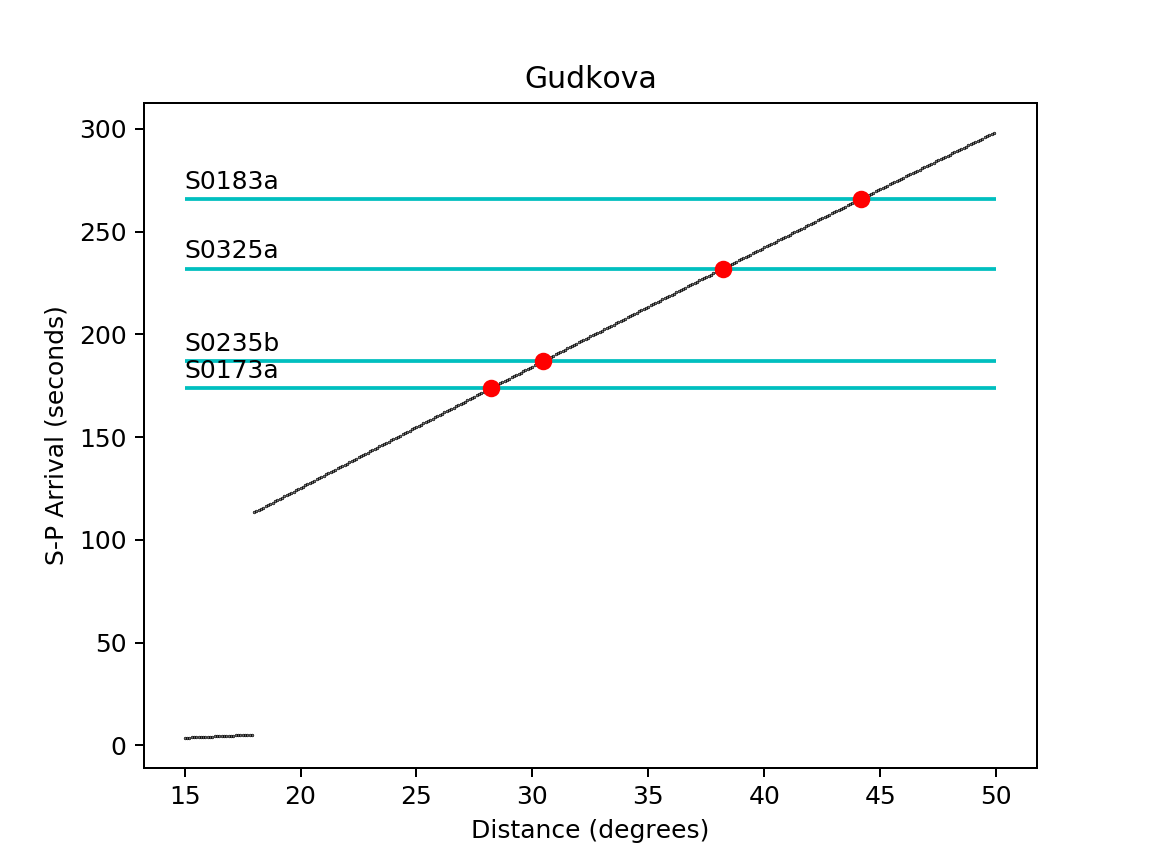

In [151]:
%matplotlib notebook

distplot("Gudkova", 25)
finaldist([28.2,30.45,38.2,44.15])

<IPython.core.display.Javascript object>


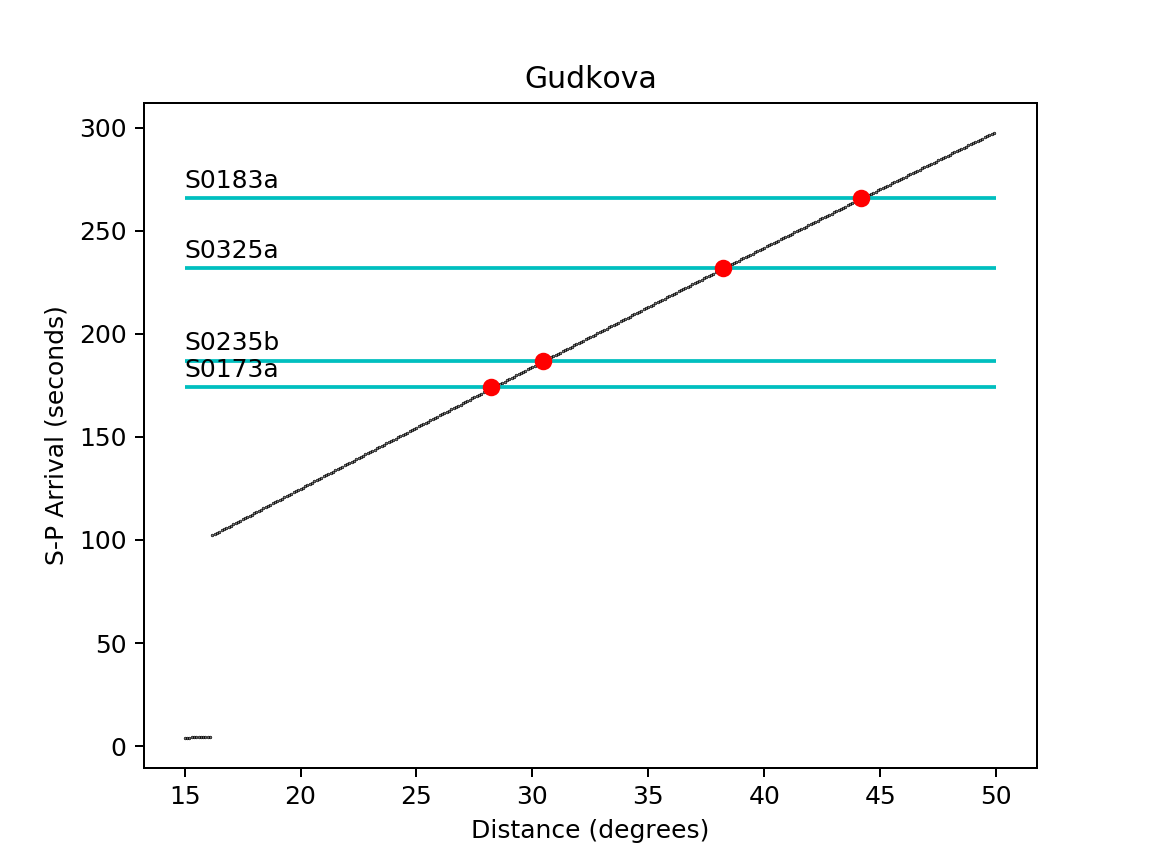

In [140]:
%matplotlib notebook

distplot("Gudkova", 35)
finaldist([28.2,30.45,38.2,44.15])

<IPython.core.display.Javascript object>


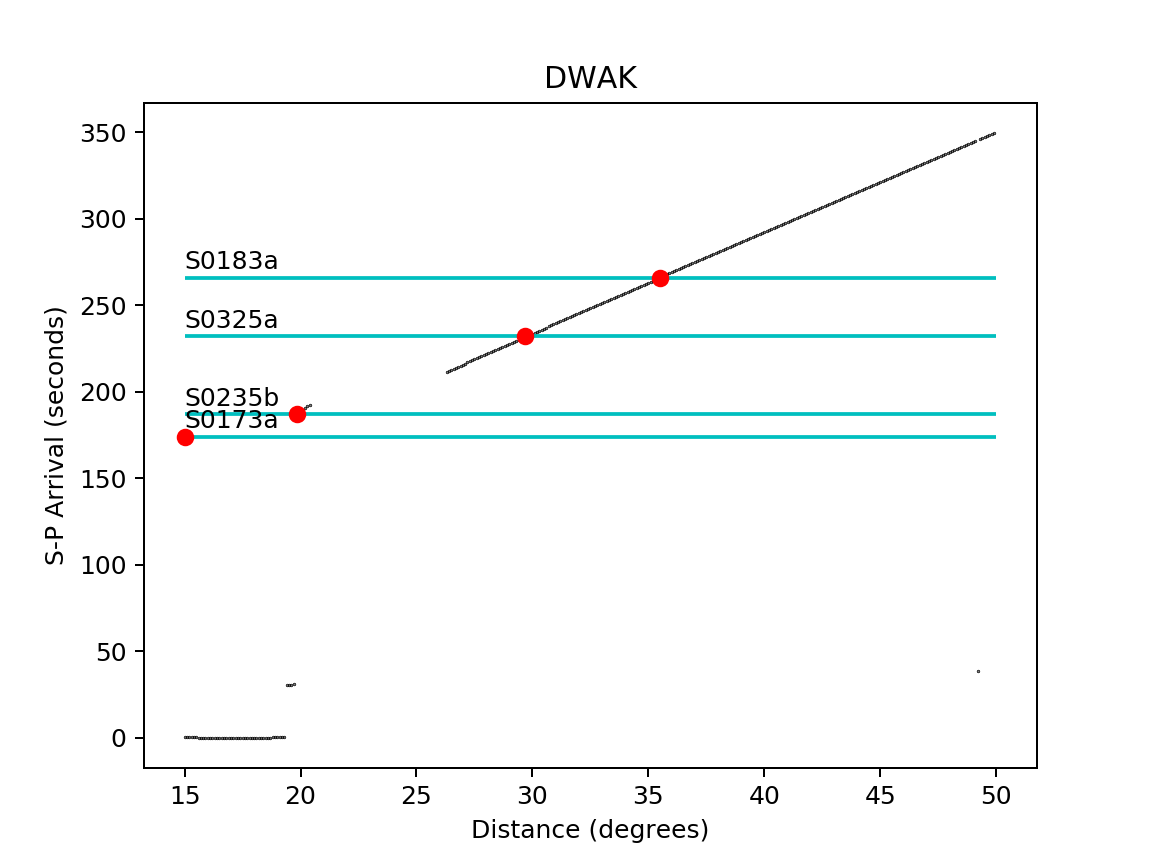

In [111]:
%matplotlib notebook
distplot("DWAK", 25)
finaldist([15,19.85,29.7,35.5])

<IPython.core.display.Javascript object>


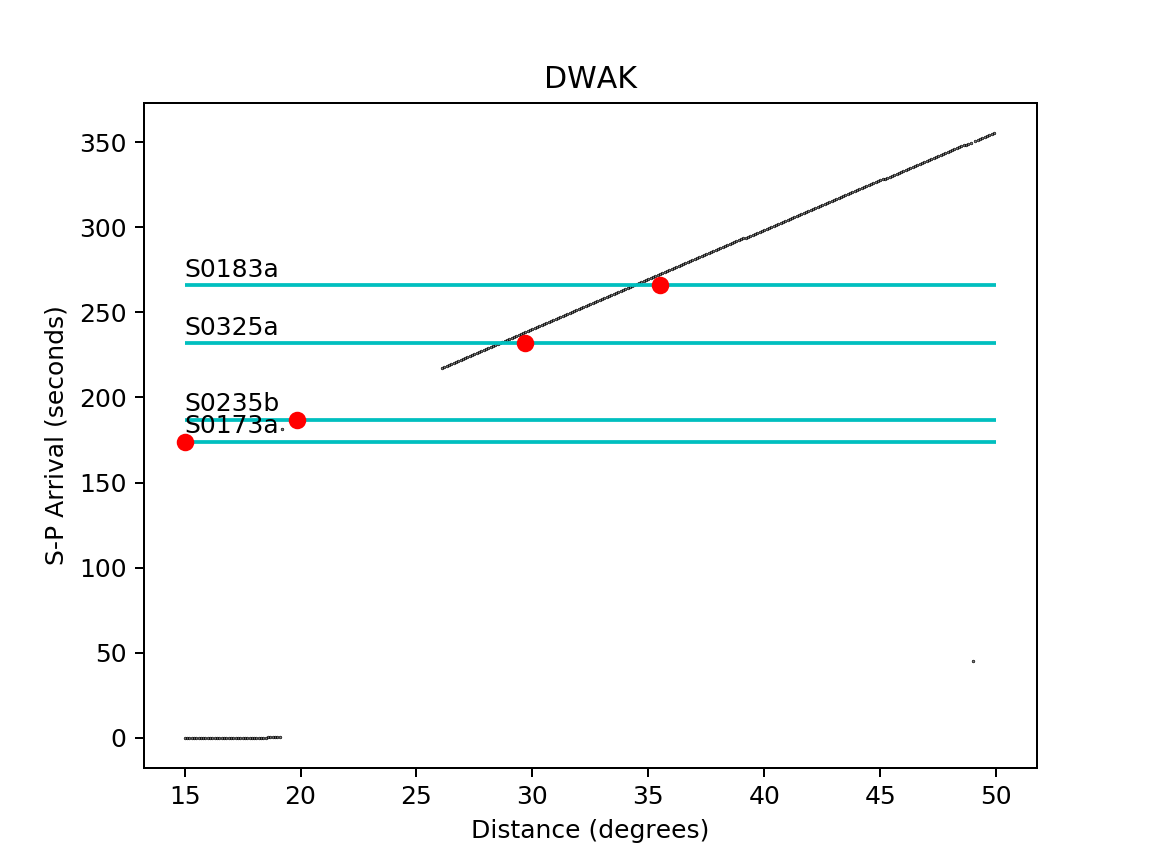

In [141]:
%matplotlib notebook
distplot("DWAK", 35)
finaldist([15,19.85,29.7,35.5])

<IPython.core.display.Javascript object>


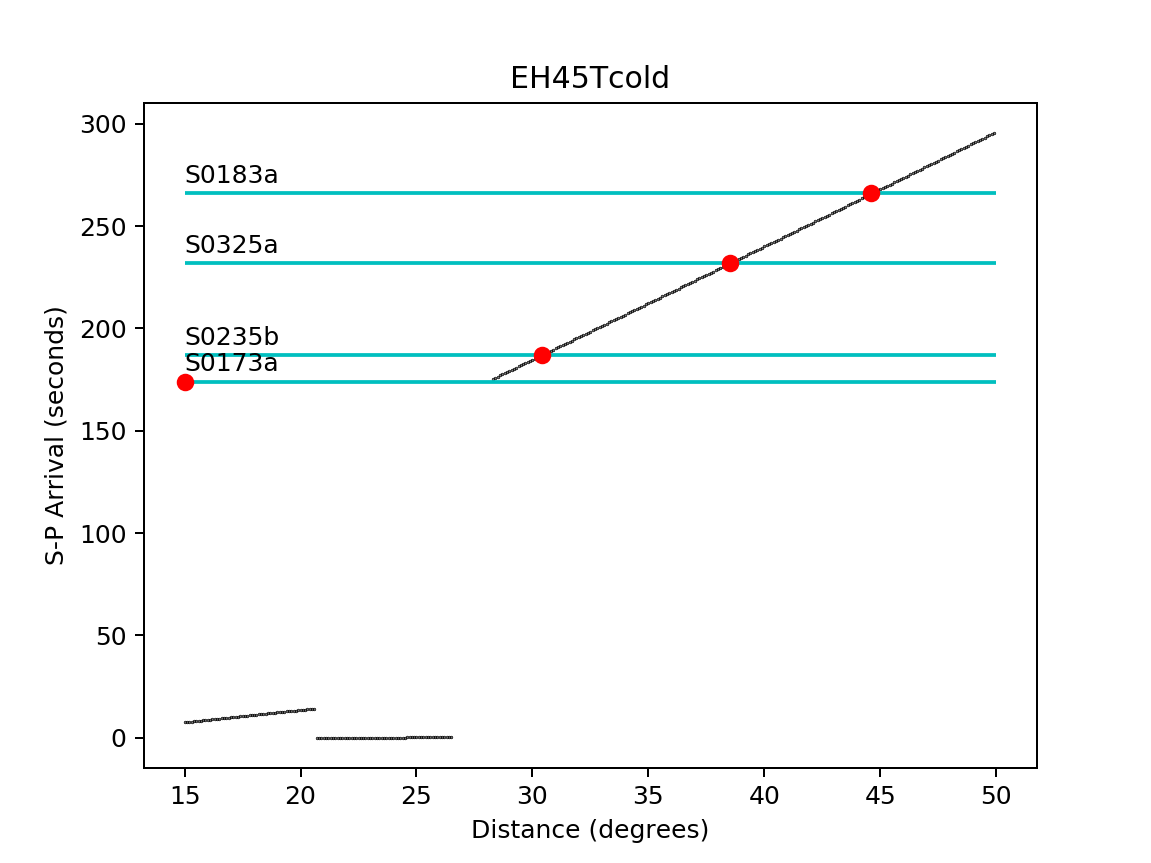

In [122]:
%matplotlib notebook
distplot("EH45Tcold", 25)
finaldist([15, 30.4, 38.5, 44.6])

<IPython.core.display.Javascript object>


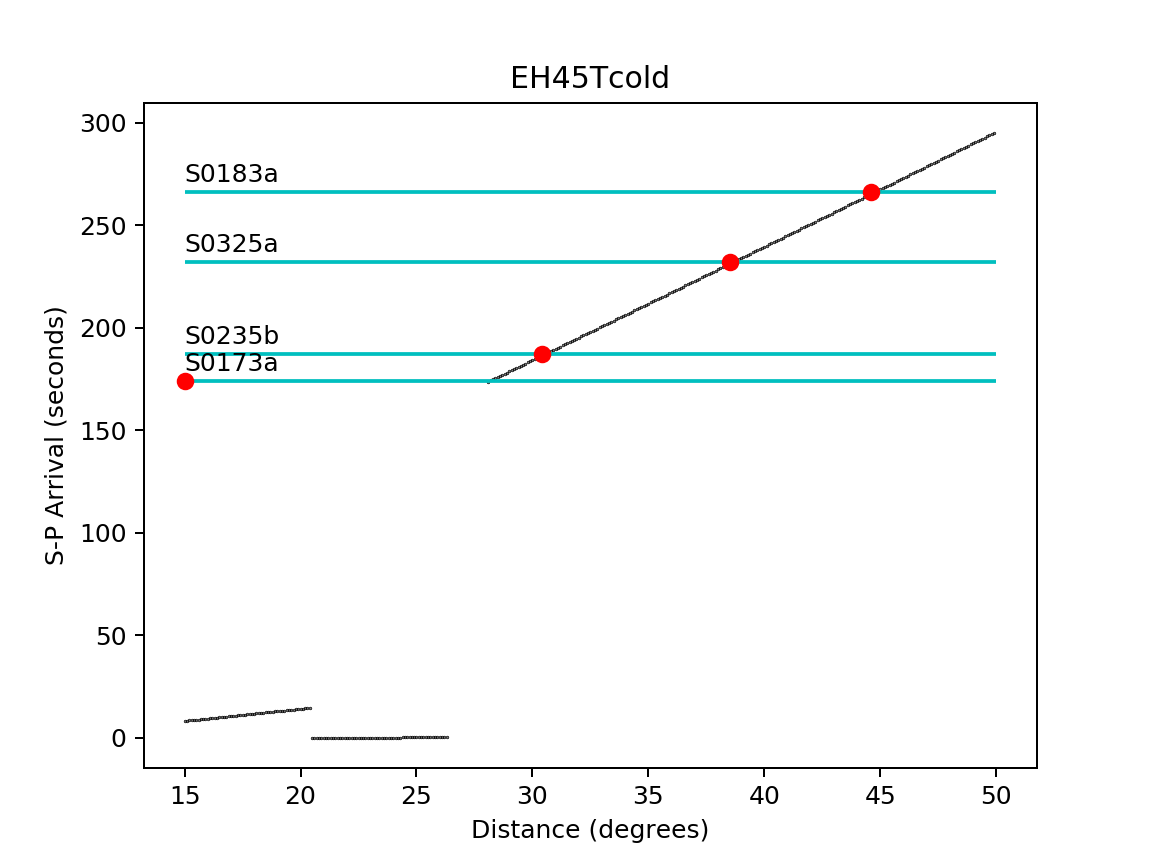

In [142]:
%matplotlib notebook
distplot("EH45Tcold", 35)
finaldist([15, 30.4, 38.5, 44.6])

<IPython.core.display.Javascript object>


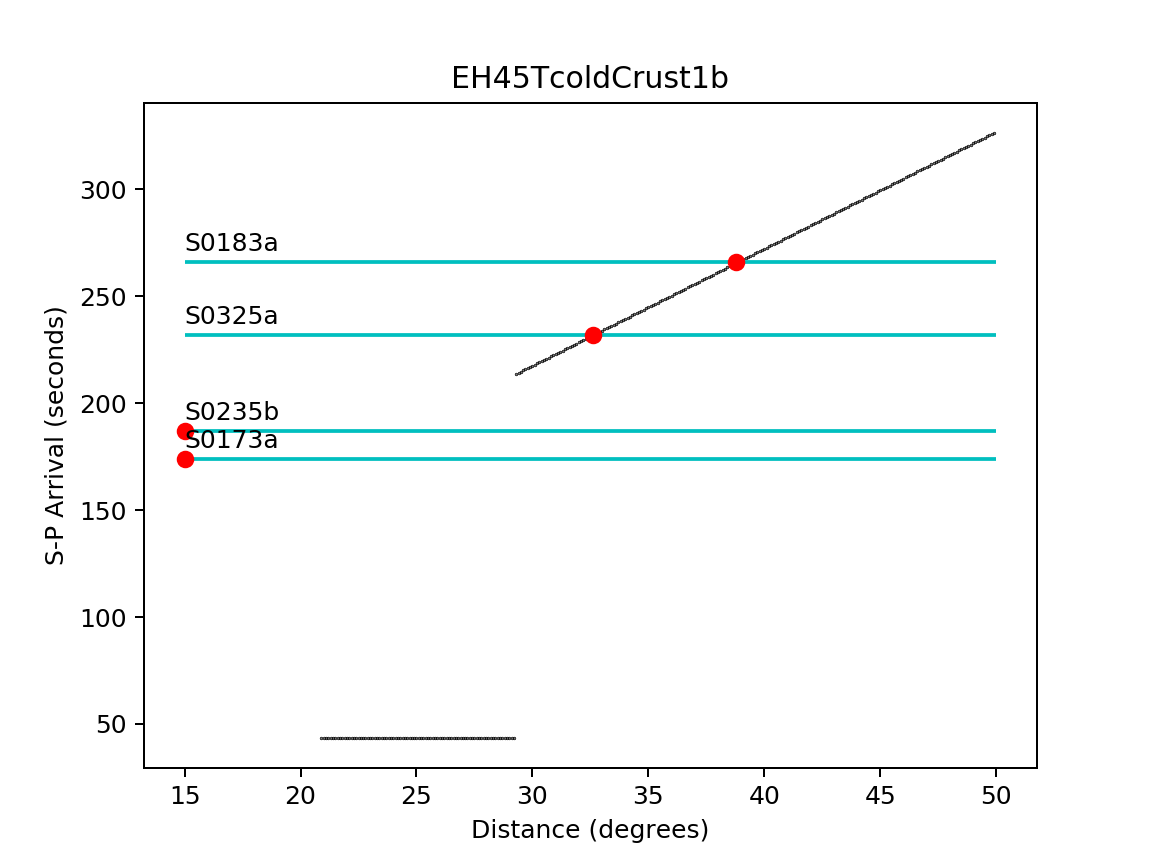

In [124]:
%matplotlib notebook
distplot("EH45TcoldCrust1b", 25)
finaldist([15,15,32.6,38.8])

<IPython.core.display.Javascript object>


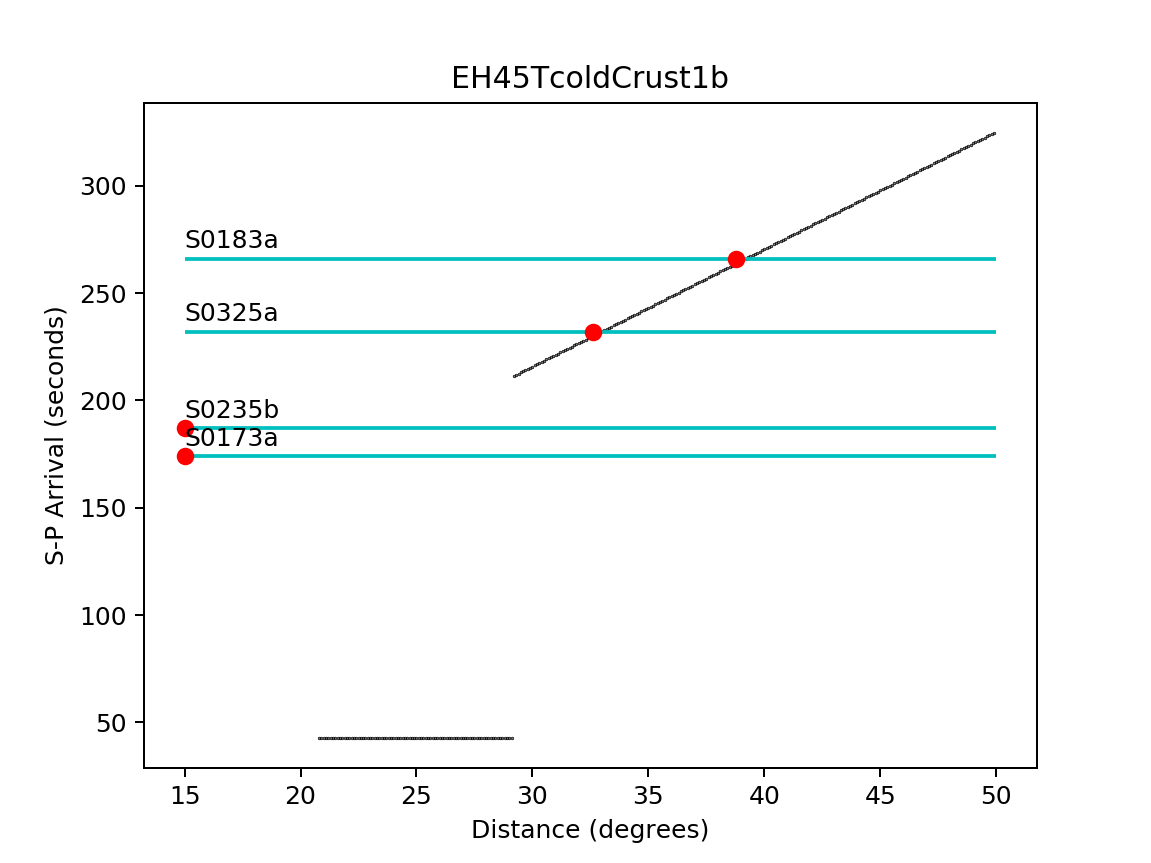

In [143]:
%matplotlib notebook
distplot("EH45TcoldCrust1b", 35)
finaldist([15,15,32.6,38.8])

<IPython.core.display.Javascript object>


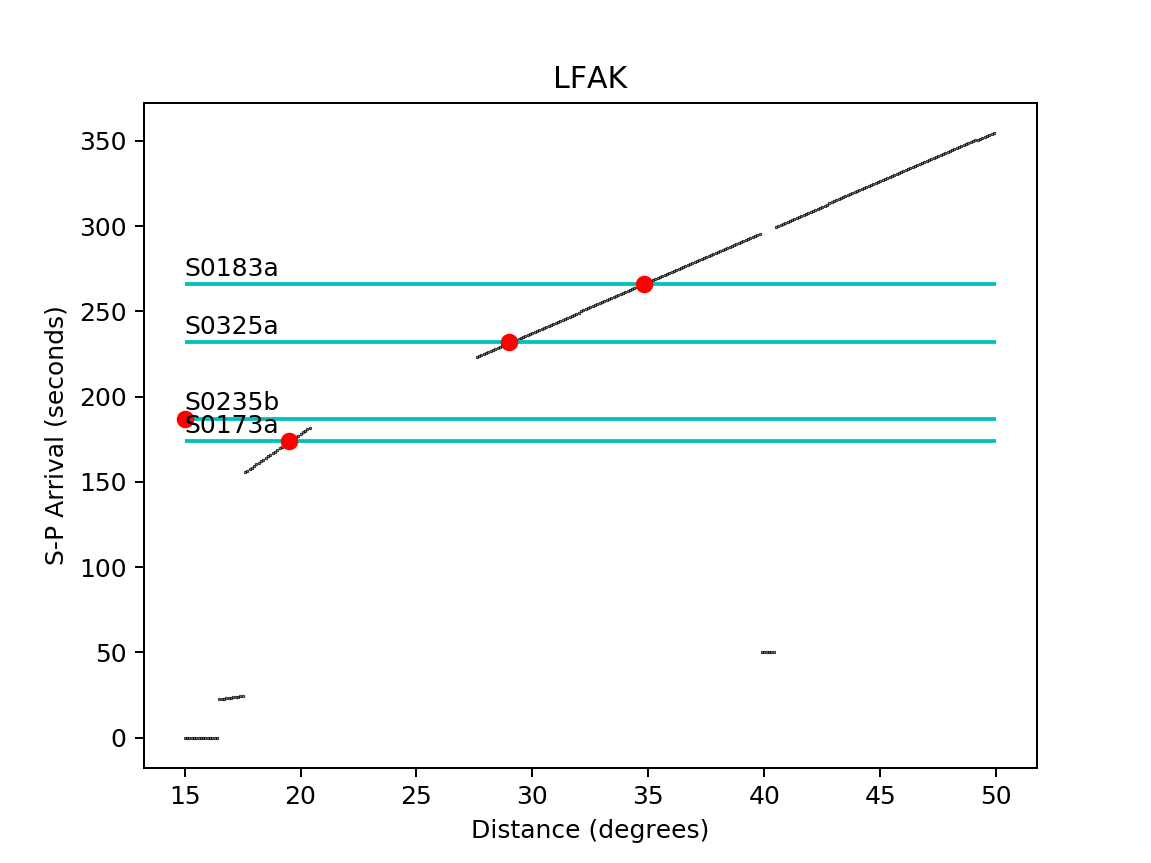

In [126]:
%matplotlib notebook
distplot("LFAK", 25)
finaldist([19.5,15,29, 34.8])

<IPython.core.display.Javascript object>


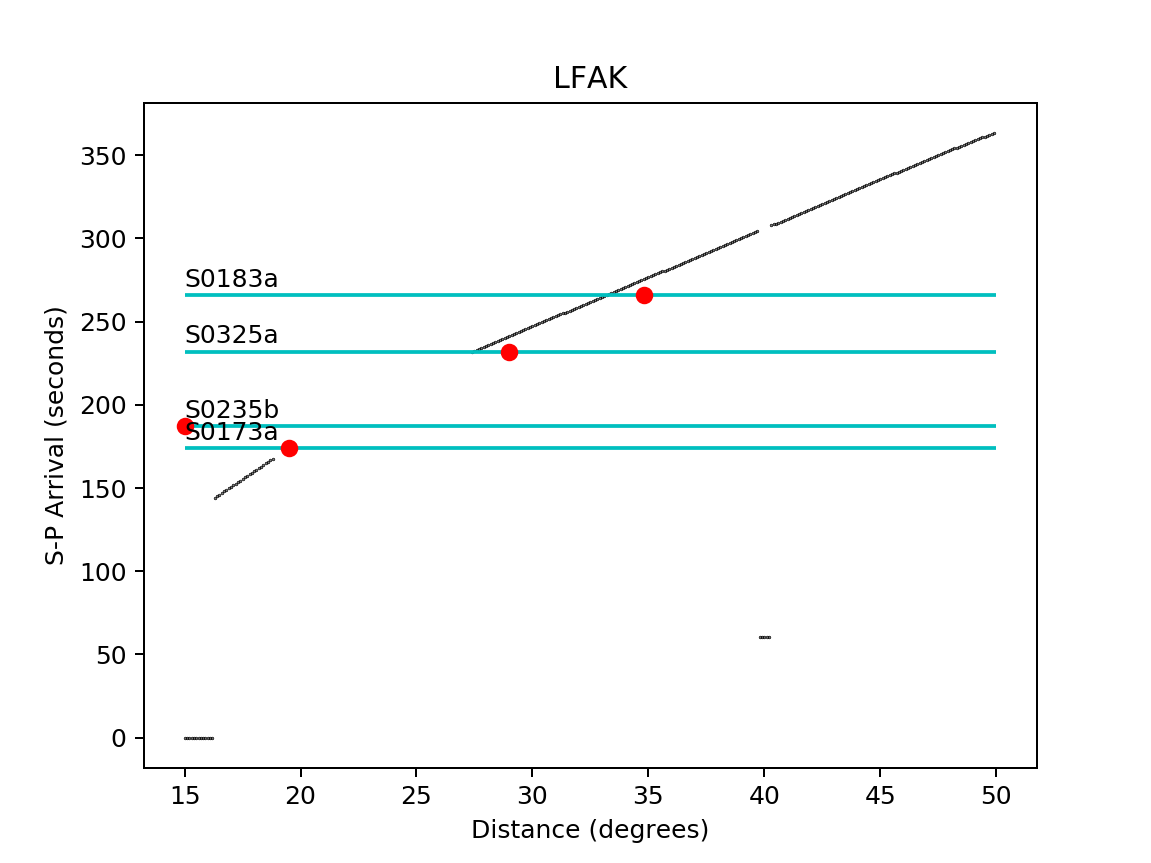

In [144]:
%matplotlib notebook
distplot("LFAK", 35)
finaldist([19.5,15,29, 34.8])

<IPython.core.display.Javascript object>


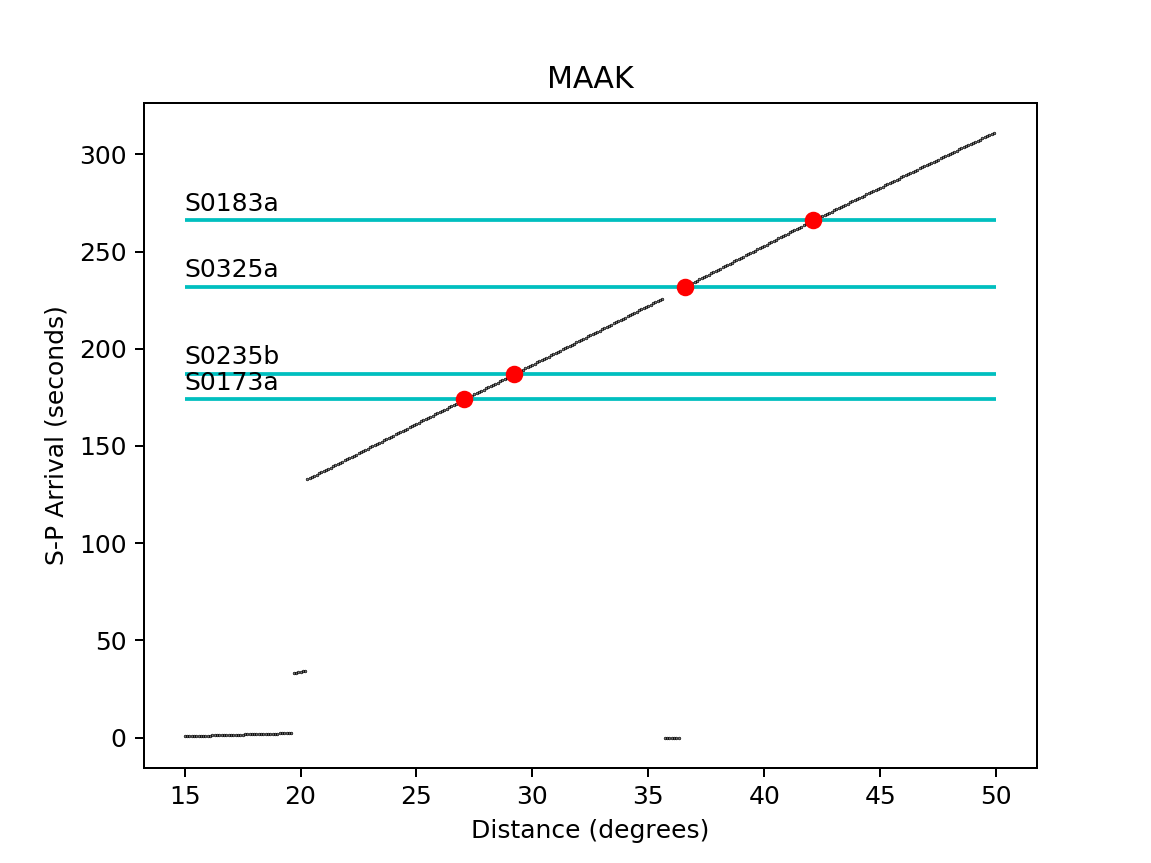

In [129]:
%matplotlib notebook
distplot("MAAK", 25)
finaldist([27.05, 29.2, 36.6, 42.1])

<IPython.core.display.Javascript object>


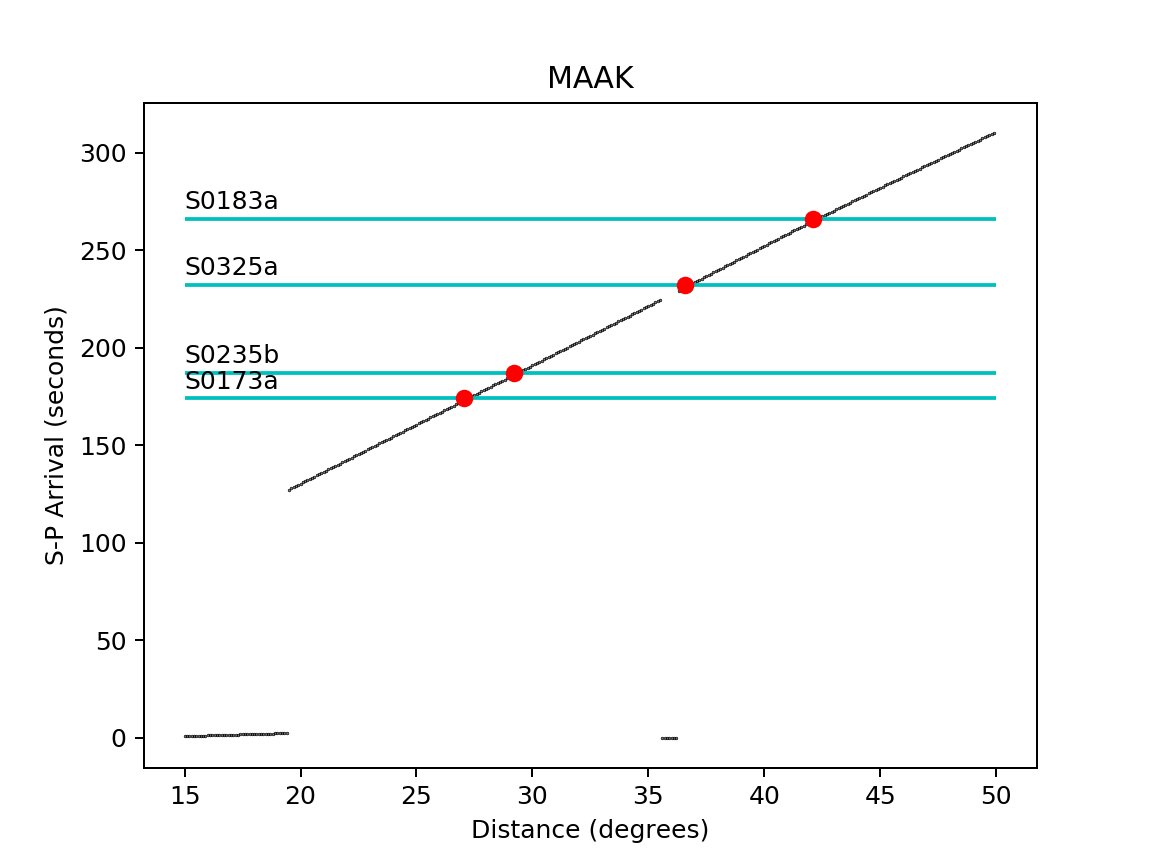

In [145]:
%matplotlib notebook
distplot("MAAK", 35)
finaldist([27.05, 29.2, 36.6, 42.1])

<IPython.core.display.Javascript object>


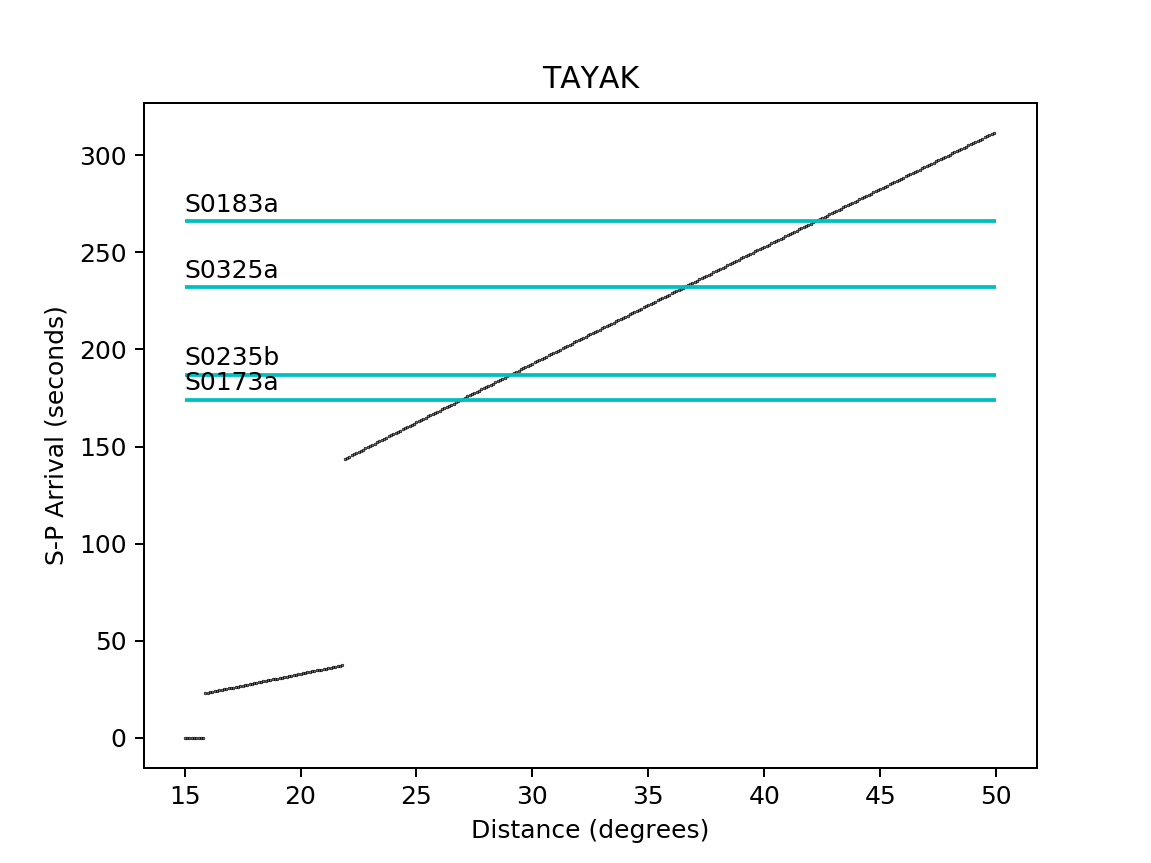

In [130]:
%matplotlib notebook
distplot("TAYAK", 25)
finaldist([26.9, 29.06, 36.5, 42.2])

<IPython.core.display.Javascript object>


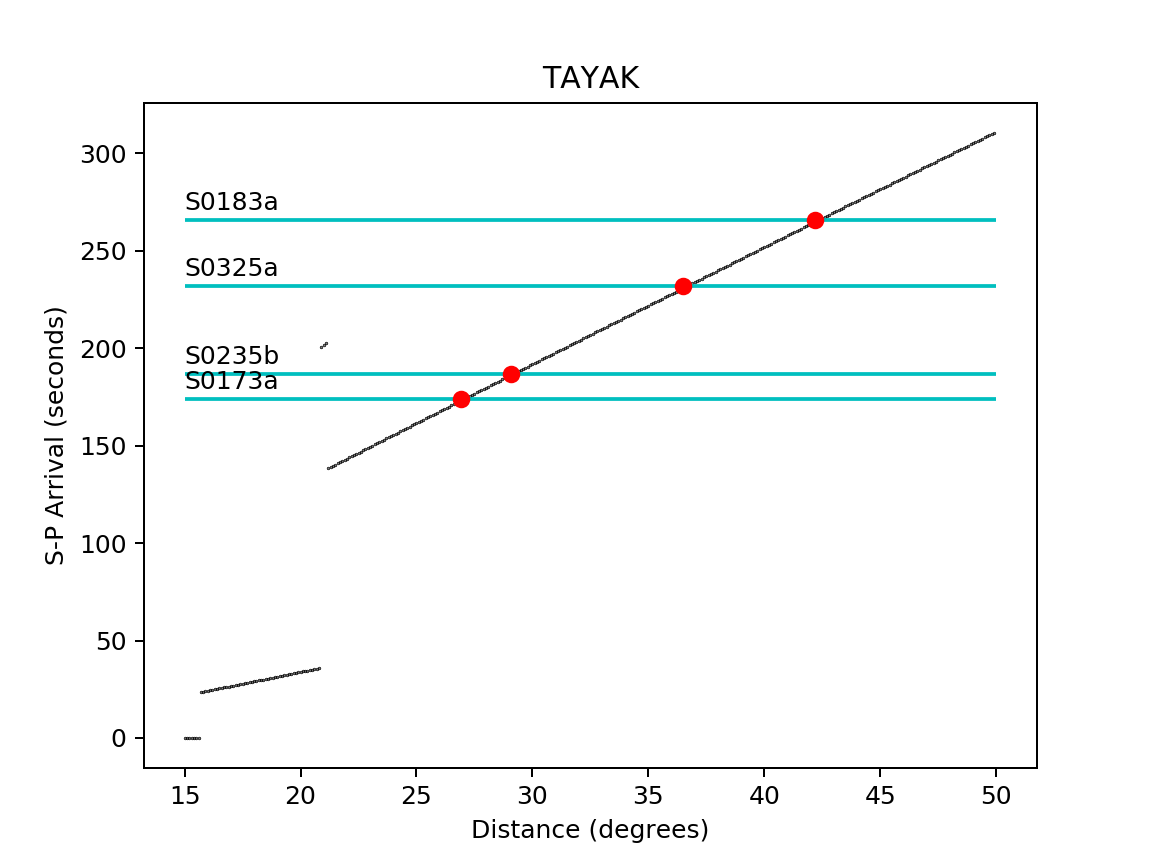

In [147]:
%matplotlib notebook
distplot("TAYAK", 35)
finaldist([26.9, 29.06, 36.5, 42.2])

# Models that Originally Didn't Recreate Arrivals

<IPython.core.display.Javascript object>


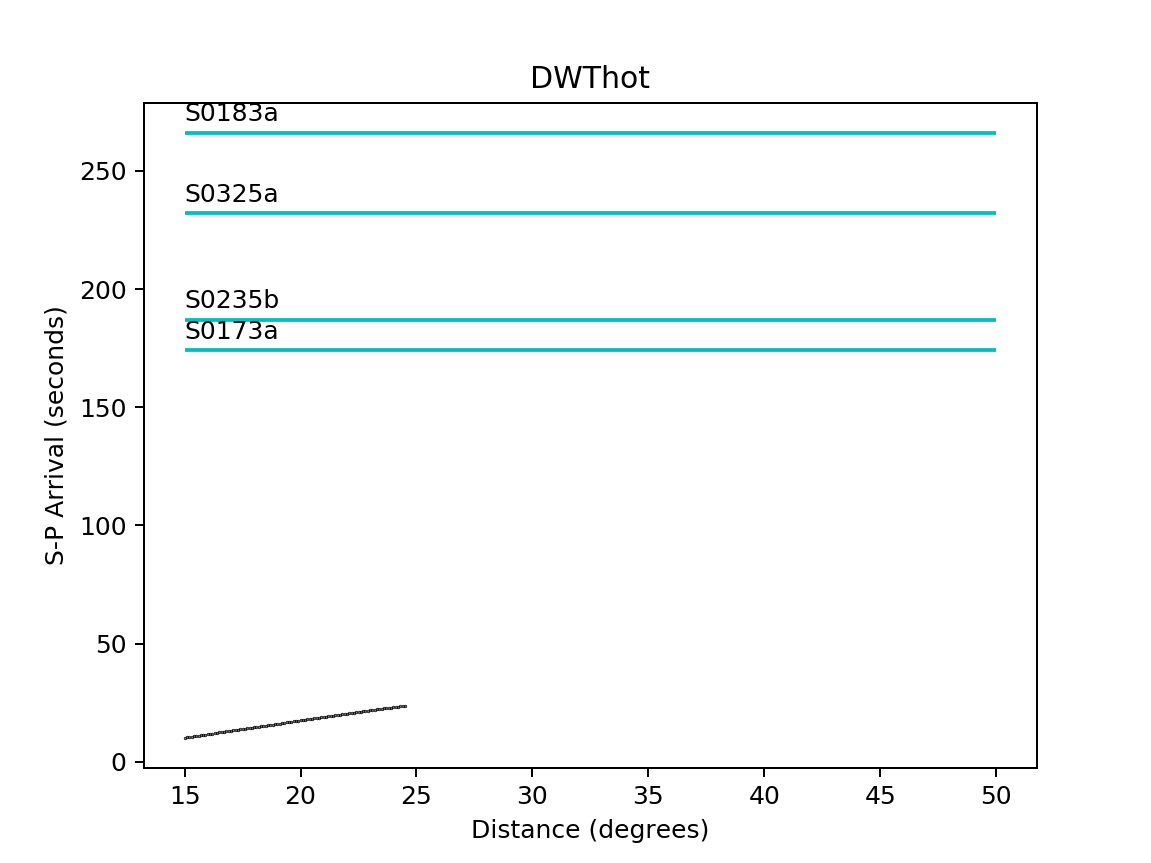

In [131]:
%matplotlib notebook
distplot("DWThot", 25)

<IPython.core.display.Javascript object>


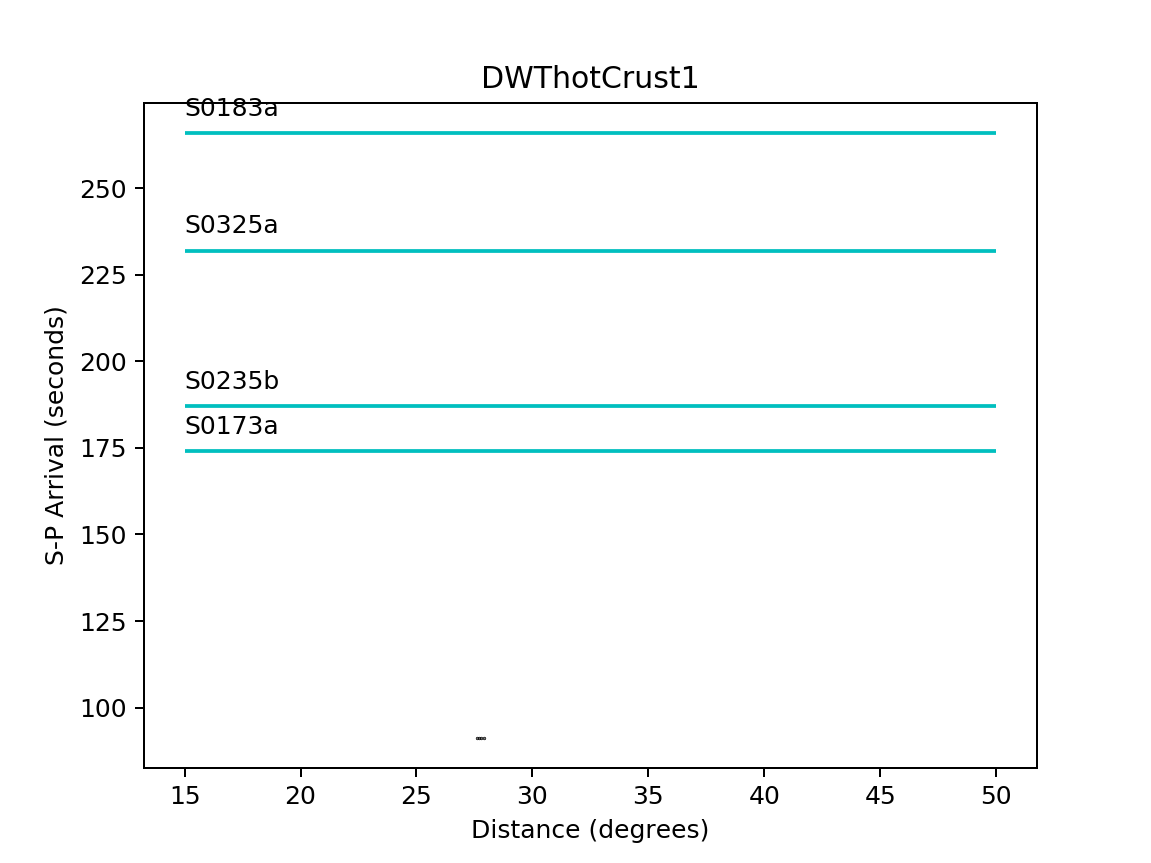

In [132]:
%matplotlib notebook
distplot("DWThotCrust1", 25)

<IPython.core.display.Javascript object>


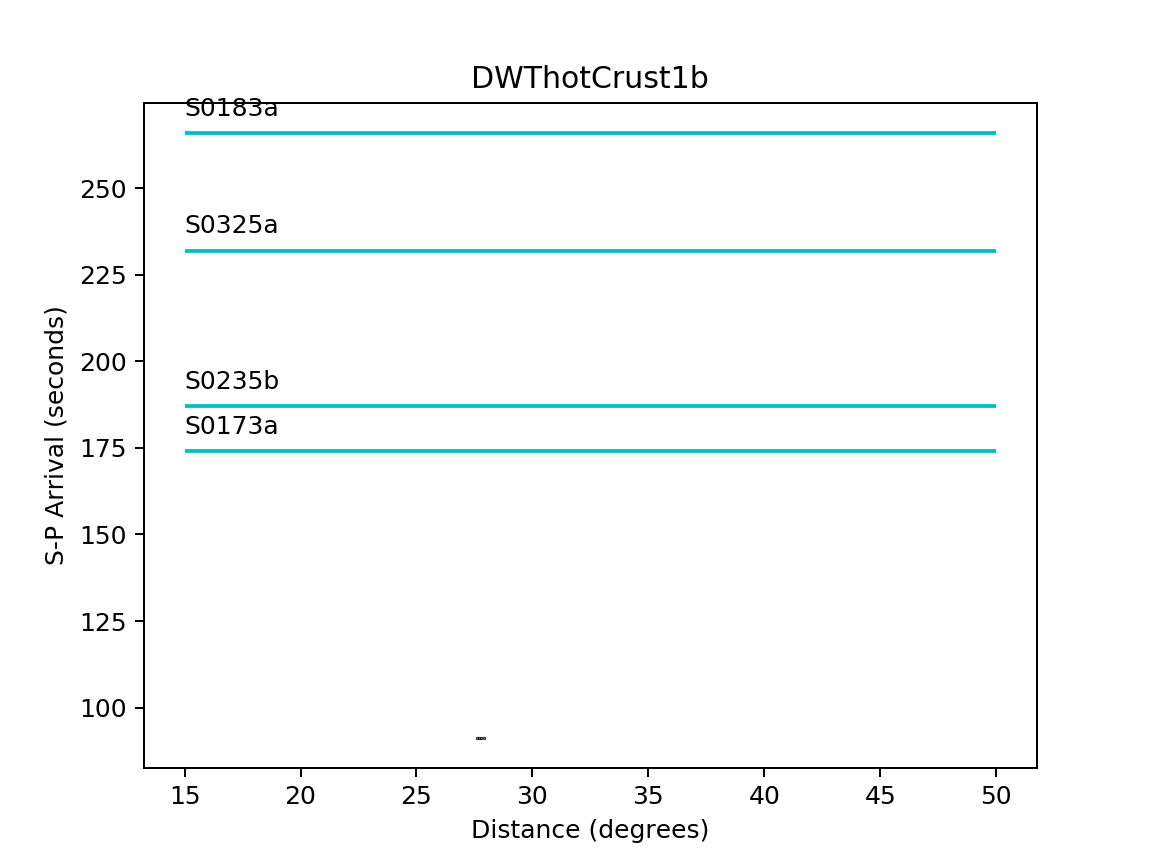

In [133]:
%matplotlib notebook
distplot("DWThotCrust1b", 25)

<IPython.core.display.Javascript object>


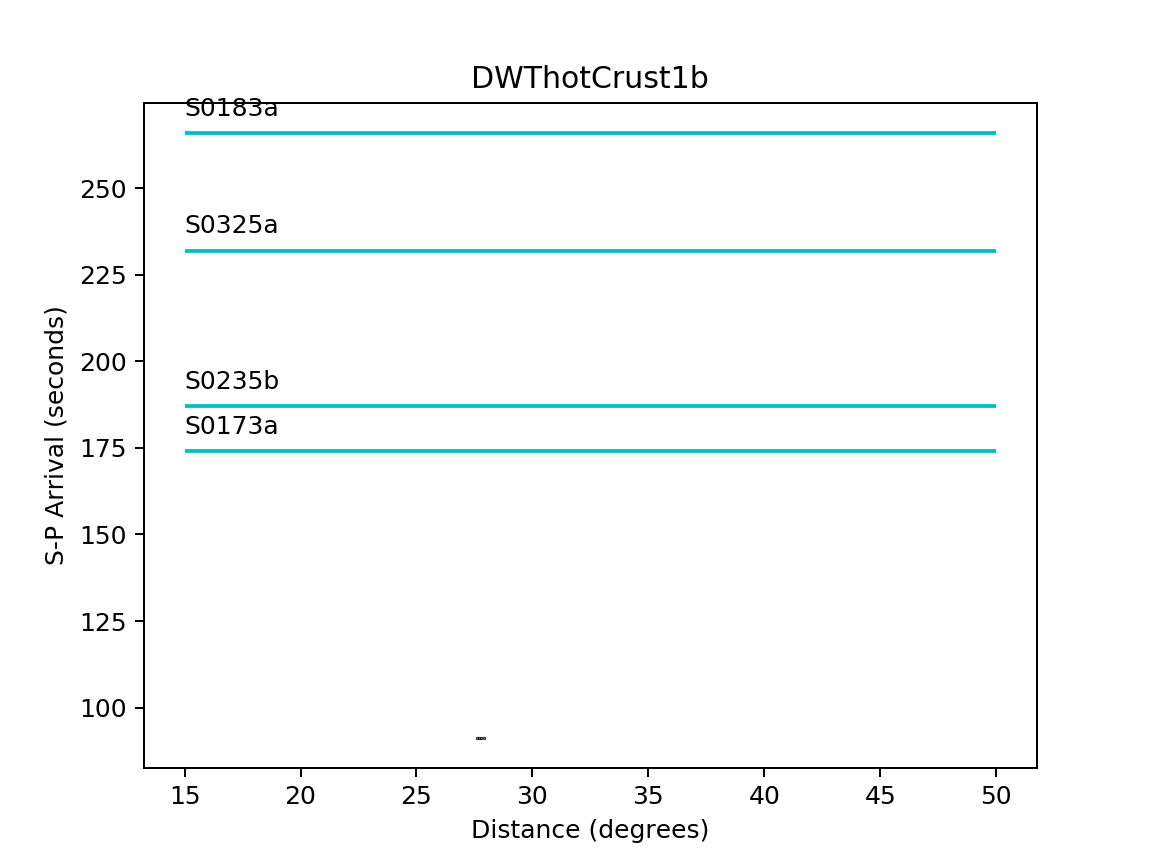

In [135]:
%matplotlib notebook
distplot("DWThotCrust1b", 25)

<IPython.core.display.Javascript object>


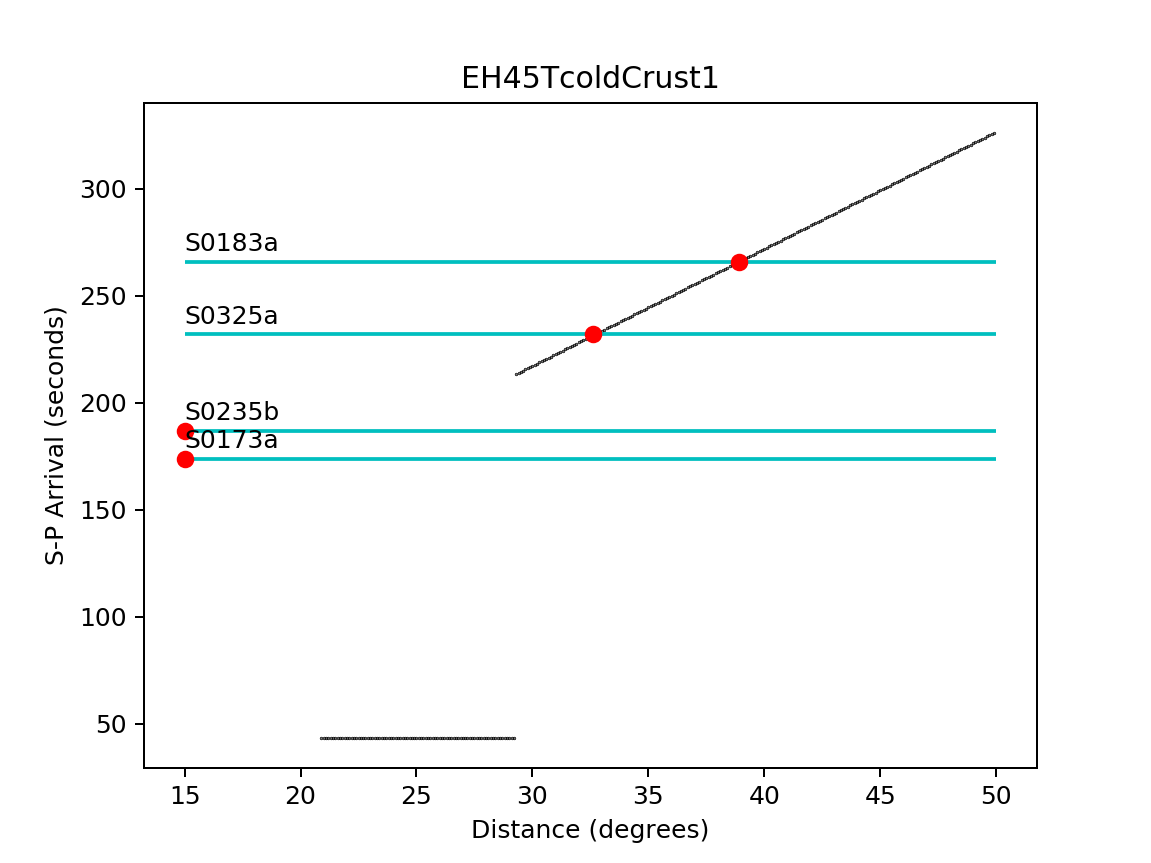

In [137]:
%matplotlib notebook
distplot("EH45TcoldCrust1", 25)
finaldist([15,15,32.6,38.9])

<IPython.core.display.Javascript object>


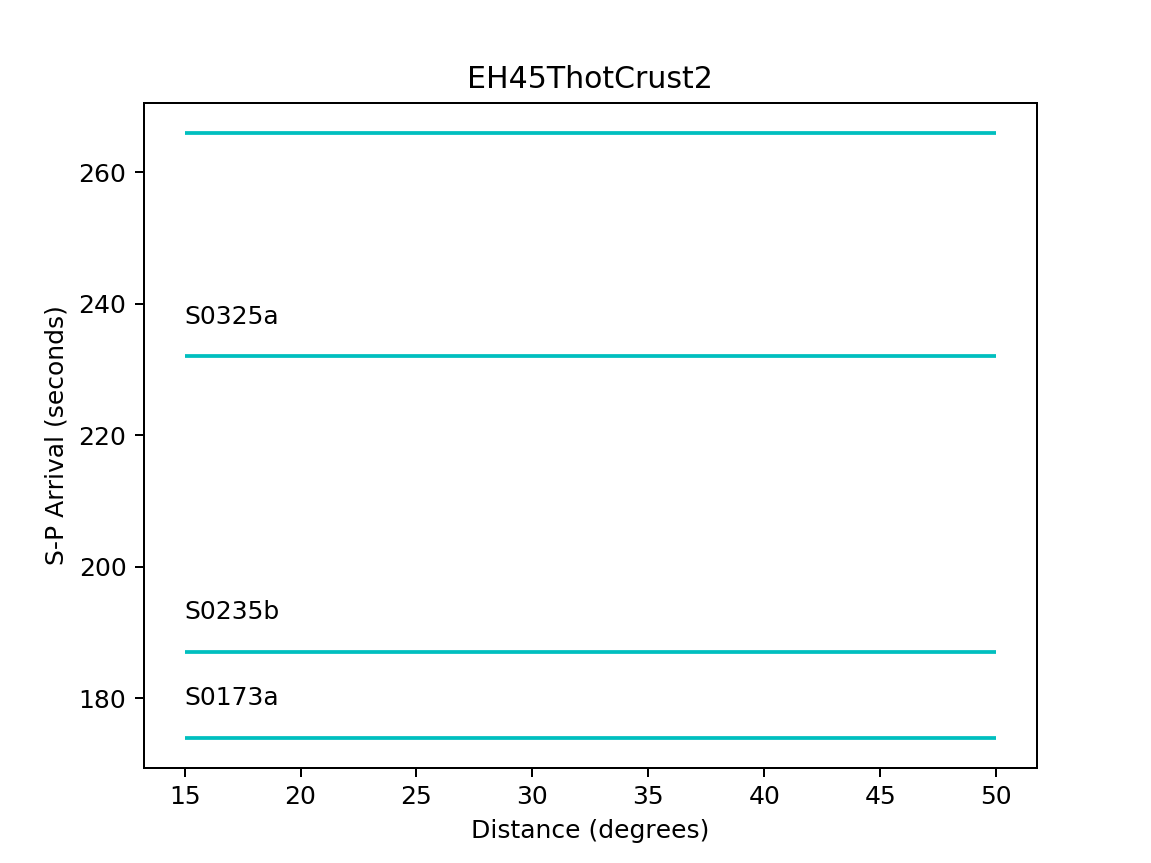

In [138]:
%matplotlib notebook
distplot("EH45ThotCrust2", 25)

<IPython.core.display.Javascript object>


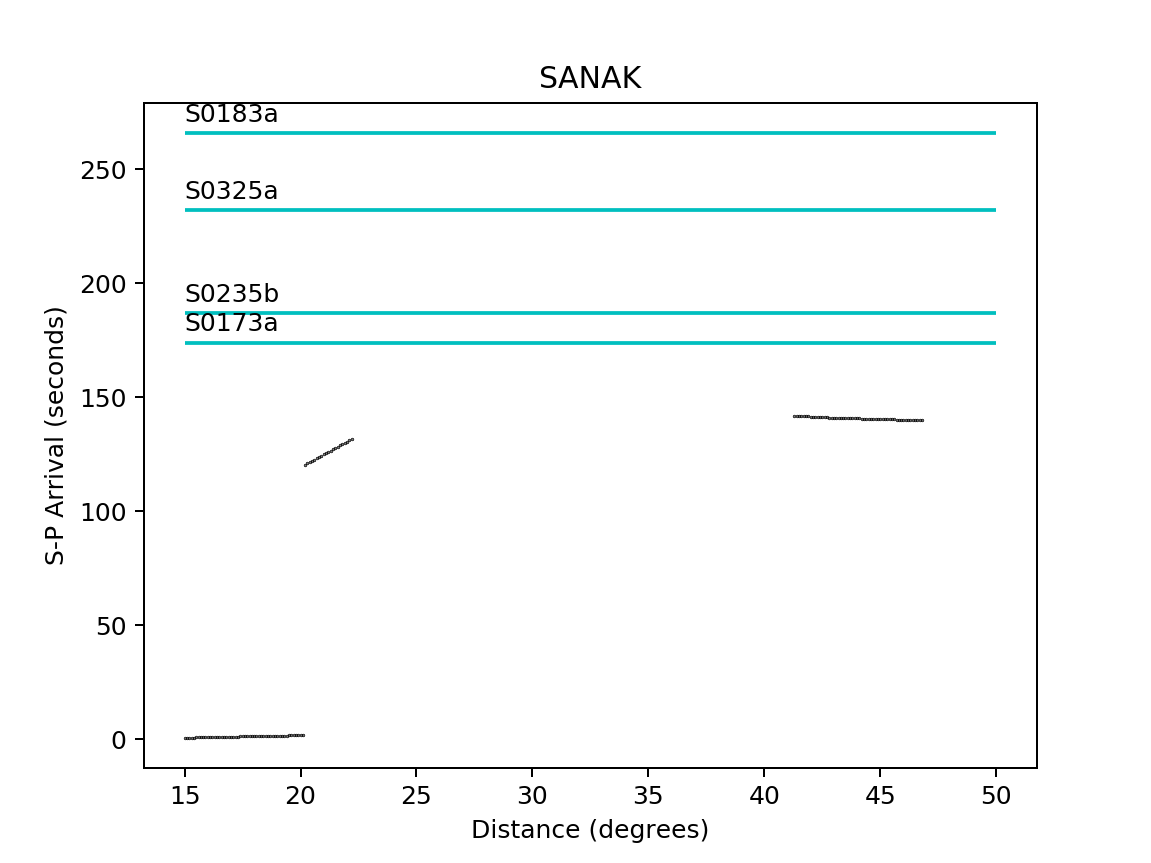

In [139]:
%matplotlib notebook
distplot("SANAK", 25)